In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd 
from sklearn import metrics

from keras.optimizers import Adam
from keras.models import Model
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import LSTM, Reshape


# Graphs

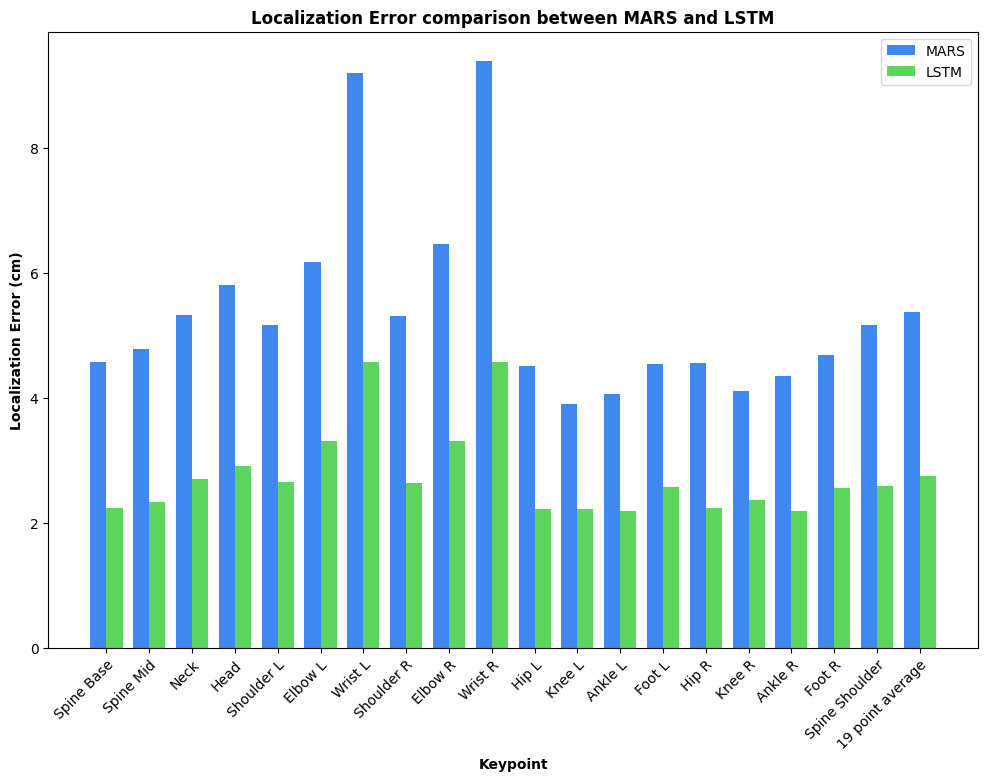

In [26]:
# Bar graph comparing localization error of two models

# Load the accuracy data
MARS_accuracy_data = np.load('models/Accuracy/MARS_accuracy.npy')
LSTM_accuracy_data = np.load('models/Accuracy/LSTM_rsf_16_accuracy.npy')


keypoint_labels = np.array(['Spine Base', 'Spine Mid', 'Neck', 'Head', 'Shoulder L', 'Elbow L', 'Wrist L', 'Shoulder R', 'Elbow R', 'Wrist R', 
                        'Hip L', 'Knee L', 'Ankle L', 'Foot L', 'Hip R', 'Knee R', 'Ankle R', 'Foot R', 'Spine Shoulder', '19 point average'])
n_keypoints = len(keypoint_labels)

localization_error = np.array([MARS_accuracy_data[:, 6], LSTM_accuracy_data[:, 6]])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(n_keypoints) * 2
width = 0.75

# Plot the data
ax.bar(x - width/2, localization_error[0], width, label='MARS', color='#3e88ef')
ax.bar(x + width/2, localization_error[1], width, label='LSTM', color='#5dd55d')

# Add values on top of the bars
# for i in range(n_keypoints):
#     ax.text(x[i] + 0.05, localization_error[0, i] + 0.1, f'{localization_error[0, i]:.2f}', ha='center', va='bottom', weight='bold', color='#3e88ef')
#     ax.text(x[i] + width + 0.05, localization_error[1, i] + 0.1, f'{localization_error[1, i]:.2f}', ha='center', va='bottom', weight='bold', color='#5dd55d')

# Add labels and legend
ax.set_title('Localization Error comparison between MARS and LSTM', weight='black')
ax.set_xticks(x)
ax.set_xticklabels(keypoint_labels, rotation=45, ha='right', rotation_mode='anchor', va='top')
ax.set_ylabel('Localization Error (cm)', weight='black')
ax.set_xlabel('Keypoint', weight='black')
ax.legend()
plt.show(block=True)
# plt.savefig('models/Accuracy/localization_error_MARS_vs_LSTM.png')


